# 機械学習のための前処理を行う

### <span style="color: red; ">この記事は，Software Design 2018年2月号 1特集 2章，3章を参考にし，一部改変しています．</span>

## 1. データを取得する

[Kaggle ML and Data Science Survey, 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)からダウンロード

最初にKaggleにログインする必要がある．

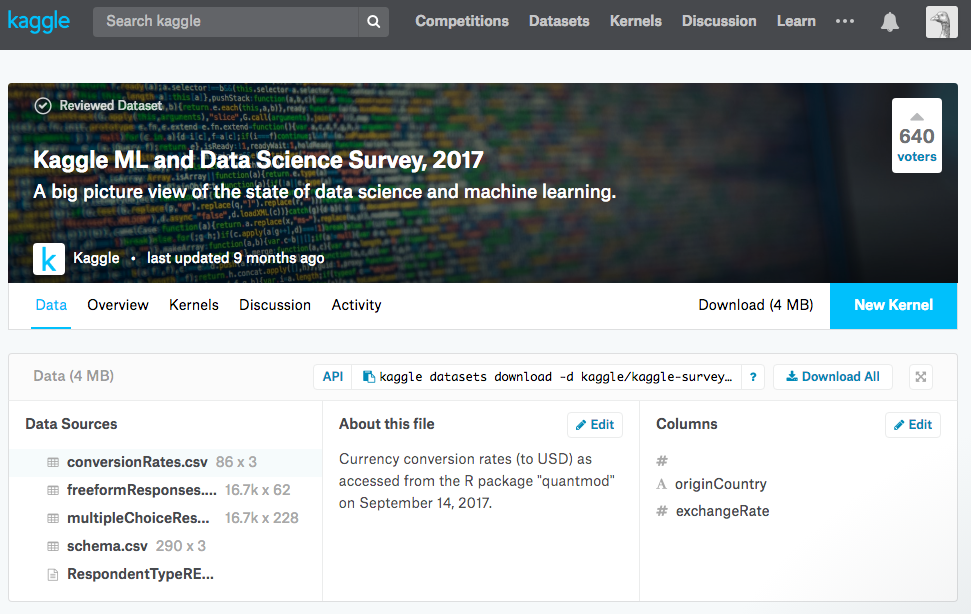

kaggle-survey-2017.zipを解答する．

この中のmultipleChoiceResponses.csvを用いる．

## 2. データを読み込む

ライブラリpandasを用いて，データ処理を行う．pandasを用いると，データ加工の様々な処理が可能である．ただし，多岐に渡るため，使いこなすようになるまで学習コストが高い．一度習得すると，一生モノ（注：2018年時点ではあと5年は使えるという意味）である．

pandasを呼び出して，CSVファイルを読み込む．デフォルトのエンコードはUTF-8であるが，今回はISO-8859-1を指定する．read_csv関数は読み込んだデータの型を自動判別する．low_memory=Falseを指定することで混在する型がないことを保証し，型を精査する処理を省略している．

In [233]:
import pandas as pd

res_df = pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1',low_memory=False)

読み込んだデータは行と列で構成される2次元のデータでDataFrameと呼ばれる．表計算ソフトと同じである．

読み込んだ2次元データのサイズを表示する．

In [234]:
res_df.shape

(16716, 228)

先頭3行，3列を表示する．行がレコード，列がカラムである． ilocインデクサはデータの位置を指定して取り出す．

In [235]:
res_df.iloc[:3, :3]

,GenderSelect,Country,Age
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN
1,Female,United States,30.0
2,Male,Canada,28.0


年齢の先頭5つを表示する．DataFrameから取り出せる1次元のデータはSeriesと呼ばれる．

In [236]:
res_df['Age'].head()

0     NaN
1    30.0
2    28.0
3    56.0
4    38.0
Name: Age, dtype: float64

年齢と国を取り出す．

In [237]:
res_df[['Age', 'Country']].head()

,Age,Country
0,NaN,NaN
1,30.0,United States
2,28.0,Canada
3,56.0,United States
4,38.0,Taiwan


locインデクサを用いるとラベルを指定したデータの抽出ができる

In [238]:
res_df.loc[10,'Country']

'Russia'

複数の要素でも使える．locのスライスは開始位置と終了位置が含まれることに注意

In [239]:
res_df.loc[10:12, ['Country', 'Age']]

,Country,Age
10,Russia,20.0
11,India,27.0
12,Brazil,26.0


行，列に「:」を与えると，全部取り出せる．次は，4行のすべてのカラムを取り出している．ただし，列数が多いのでhead()で先頭5つを出力している

In [240]:
res_df.iloc[4, :].head()

GenderSelect                      Male
Country                         Taiwan
Age                                 38
EmploymentStatus    Employed full-time
StudentStatus                      NaN
Name: 4, dtype: object

つまり，次と同じである．

In [241]:
res_df.iloc[4,:5]

GenderSelect                      Male
Country                         Taiwan
Age                                 38
EmploymentStatus    Employed full-time
StudentStatus                      NaN
Name: 4, dtype: object

## 3. データ抽出の基礎

locやilocでは次のように行や列に真理値を指定し，Trueと指定しているデータのみ抽出できる． 次の例では行に[True, False, True],を与えて，列に[False, True, True]を与えているので，1行目と3行目を取り出し，2列目と3列目を取り出している．

In [242]:
res_df.loc[[True, False, True],[False, True, True]]

,Country,Age
0,NaN,NaN
2,Canada,28.0


SeriesやDataFrameに対して比較演算を行うと真理値が返りますが，この真理値を利用してデータの抽出ができる．

In [243]:
(res_df['Age']>50).head()

0    False
1    False
2    False
3     True
4    False
Name: Age, dtype: bool

例えば，50歳以上のレコードを取り出し，先頭5つを表示する．さらに先頭3つのカラムだけ表示するには次のようになる．

In [244]:
res_df.loc[res_df['Age']>50].iloc[:5, :3]

,GenderSelect,Country,Age
3,Male,United States,56.0
13,Male,Netherlands,54.0
15,Male,United States,58.0
16,Male,Italy,58.0
26,Male,Netherlands,51.0


別な方法としてwhereメソッドを用いた真理値の抽出がある．locで指定した場合と異なり，Falseのデータは欠損値（NaN)となる．データ数を揃えたいときに便利です．

In [245]:
print(len(res_df))
print(len(res_df.loc[res_df['Age']>50]))
print(len(res_df.where(res_df['Age']>50)))

16716
1116
16716


例題 全体の内，日本人が何人いるか．その割合は？

In [246]:
res_df['Country']
res_df['Country']=='Japan'
ct_japan = len(res_df[res_df['Country']=='Japan'])
ct_all = len(res_df)
print("%.3f (%d/%d)" %(ct_japan/ct_all, ct_japan, ct_all))

0.017 (277/16716)


例題 日本人の平均年齢は？

In [247]:
mean_japan = res_df[res_df['Country']=='Japan']['Age'].mean()
print("%.1f" %(mean_japan))

34.7


pandasのmean()は欠損値も考慮して平均を求める．実際に確認すると以下のようになる．

In [248]:
import math

sum = 0
ct = 0
for i in res_df[res_df['Country']=='Japan']['Age']:
    if (math.isnan(i)==False) :
        sum += i
        ct += 1
print(sum)
print(sum/ct)

mean_japan = res_df[res_df['Country']=='Japan']['Age'].mean()
print("%f" %(mean_japan))

9477.0
34.714285714285715
34.714286


In [249]:
res_df[res_df['Country']=='Japan']['Age'].isnull().sum()

4

In [250]:
res_df[res_df['Country']=='Japan']['Age'].sum()

9477.0

使えるようになるまで時間がかかるが，慣れるともうpandasがないとデータ処理ができなくなる．

## 4. データ処理の実務例

### 4.1 特定の列を集約し，上位のデータを抽出する

「Country」列は回答者の現居住国を示している．国名ごとにデータを集約してみる．

In [251]:
groupby_country = res_df.groupby('Country')
groupby_country

groupby_countryはオブジェクトであり，いろいろなメソッドがある．countメソッドは欠損値であるNaN以外の値の個数を返す．

In [252]:
groupby_country.count().iloc[:3, :3]

,GenderSelect,Age,EmploymentStatus
Country,,,
Argentina,92,92,92
Australia,421,409,421
Belarus,54,54,54


先程のプログラムで，日本人は277人で，日本人で年齢がNaNは4人だとわかっている．調べてみると，以下のようになる．

In [253]:
groupby_country.count().loc['Japan','Age']

273

欠損値の補完として，平均で埋めてみる．

In [254]:
# 欠損値の補完前
res_df['Age'].head()

0     NaN
1    30.0
2    28.0
3    56.0
4    38.0
Name: Age, dtype: float64

In [255]:
# 欠損値を999で補完
res_df['Age'].fillna(999).head()

0    999.0
1     30.0
2     28.0
3     56.0
4     38.0
Name: Age, dtype: float64

In [256]:
# 年齢の平均値（NaN以外）
m = res_df['Age'].mean()
print(m)
# 欠損値を平均で補完
res_df['Age'].fillna(m).head()

32.37284101312176


0    32.372841
1    30.000000
2    28.000000
3    56.000000
4    38.000000
Name: Age, dtype: float64

In [257]:
count_df = res_df[['Country', 'Age']].copy() # 元のデータフレームから国と年齢を抜き出してコピーする
count_df['Age'] = count_df['Age'].fillna(count_df['Age'].mean()) # 年齢の欠損値を平均で埋める
groupby_country = count_df.groupby('Country') # 年齢を欠損を平均で埋めたので，これをgroupbyで国ごとのオブジェクトを作る．
groupby_country_count = groupby_country.count() # もう一度，データ数を算出する．
groupby_country_count.head()

,Age
Country,
Argentina,92
Australia,421
Belarus,54
Belgium,91
Brazil,465


In [258]:
len(groupby_country_count) # 国の数

52

国ごとのデータ数を集計できた．上位の国だけ選ぶ．

In [259]:
groupby_country_count.sort_values('Age', ascending=False).head()

,Age
Country,
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535


In [260]:
groupby_country_count.sort_values('Age', ascending=False).loc['Japan','Age']

277

国名にOtherがあるが，これを除外した上位12カ国のデータを取り出す．

In [261]:
drop_other = groupby_country_count.drop('Other')
top12_countries = drop_other.sort_values('Age', ascending=False).index[:12]

In [262]:
top12_countries

Index(['United States', 'India', 'Russia', 'United Kingdom',
       'People 's Republic of China', 'Brazil', 'Germany', 'France', 'Canada',
       'Australia', 'Spain', 'Japan'],
      dtype='object', name='Country')

いよいよ，元のデータから上記12カ国を抽出する．
まず，インデックスを'Country'にする． もともとのインデックスはレコード番号（先頭は0）である．破壊的な作業となるので一度確認していおく良い． inplace=Trueとすると，元のデータに上書き（破壊）する．

In [263]:
res_df.iloc[:3, :3]

,GenderSelect,Country,Age
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN
1,Female,United States,30.0
2,Male,Canada,28.0


In [264]:
res_df.set_index('Country', inplace=True)

In [265]:
res_df.iloc[:3, :3]

,GenderSelect,Age,EmploymentStatus
Country,,,
NaN,"Non-binary, genderqueer, or gender non-conforming",NaN,Employed full-time
United States,Female,30.0,"Not employed, but looking for work"
Canada,Male,28.0,"Not employed, but looking for work"


元のデータから指定した条件を抽出する方法と，指定した条件を除外する方法がある．今回は指定した条件を除外する．

In [266]:
drop_counties = res_df.index.difference(top12_countries) # 元のデータからtop12_countries以外を抜き出す．

In [267]:
drop_counties

Index([                nan,         'Argentina',           'Belarus',
                 'Belgium',             'Chile',          'Colombia',
          'Czech Republic',           'Denmark',             'Egypt',
                 'Finland',            'Greece',         'Hong Kong',
                 'Hungary',         'Indonesia',              'Iran',
                 'Ireland',            'Israel',             'Italy',
                   'Kenya',          'Malaysia',            'Mexico',
             'Netherlands',       'New Zealand',           'Nigeria',
                  'Norway',             'Other',          'Pakistan',
             'Philippines',            'Poland',          'Portugal',
       'Republic of China',           'Romania',         'Singapore',
            'South Africa',       'South Korea',            'Sweden',
             'Switzerland',            'Taiwan',            'Turkey',
                 'Ukraine',           'Vietnam'],
      dtype='object', name='Country')

In [268]:
res_df.drop(drop_counties, inplace=True)

これでデータ数がトップ12ヵ国のデータフレームができた！！

In [269]:
res_df.shape

(11310, 227)

元の16716から，11310にデータが削減した．列数が227となっているのは，インデックスにCountryを割り当てたので，1つ減った．

In [270]:
res_df.iloc[:5,:5]

,GenderSelect,Age,EmploymentStatus,StudentStatus,LearningDataScience
Country,,,,,
United States,Female,30.0,"Not employed, but looking for work",NaN,NaN
Canada,Male,28.0,"Not employed, but looking for work",NaN,NaN
United States,Male,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN
Brazil,Male,46.0,Employed full-time,NaN,NaN
United States,Male,35.0,Employed full-time,NaN,NaN


In [271]:
res_df.index.unique()

Index(['United States', 'Canada', 'Brazil', 'India', 'Australia', 'Russia',
       'United Kingdom', 'Germany', 'People 's Republic of China', 'Japan',
       'France', 'Spain'],
      dtype='object', name='Country')

In [272]:
len(res_df.index.unique())

12

データを読み込んで，データ数の多い上位12ヵ国のみのデータフレームを作るには以下のようにする．
(これまでの手順がよくわからなくなったら，4．2に進む前に次の手順を行う）

In [273]:
import pandas as pd

res_df = pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1',low_memory=False) # データを読み込む

groupby_country = res_df.groupby('Country') # 国で抜き出したオブジェクトを作る
count_df = res_df[['Country', 'Age']].copy() # 元のデータフレームから国と年齢を抜き出してコピーする
count_df['Age'] = count_df['Age'].fillna(count_df['Age'].mean()) # 年齢の欠損値を平均で埋める
groupby_country = count_df.groupby('Country') # 年齢を欠損を平均で埋めたので，これをgroupbyで国ごとのオブジェクトを作る．
groupby_country_count = groupby_country.count() # もう一度，データ数を算出する．

drop_other = groupby_country_count.drop('Other') # 国名がOtherは除外する
top12_countries = drop_other.sort_values('Age', ascending=False).index[:12] # データ数がトップ12の国を選ぶ

res_df.set_index('Country', inplace=True)
drop_counties = res_df.index.difference(top12_countries) # 元のデータからtop12_countries以外を抜き出す．
res_df.drop(drop_counties, inplace=True)

確認する

In [274]:
res_df.shape

(11310, 227)

In [275]:
res_df.iloc[:5,:5]

,GenderSelect,Age,EmploymentStatus,StudentStatus,LearningDataScience
Country,,,,,
United States,Female,30.0,"Not employed, but looking for work",NaN,NaN
Canada,Male,28.0,"Not employed, but looking for work",NaN,NaN
United States,Male,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN
Brazil,Male,46.0,Employed full-time,NaN,NaN
United States,Male,35.0,Employed full-time,NaN,NaN


In [276]:
len(res_df.index.unique())

12

## データ処理して描画する

データサイエンティストはどんなツールを使っているか調査する．
ここからはダイジェストで紹介する．

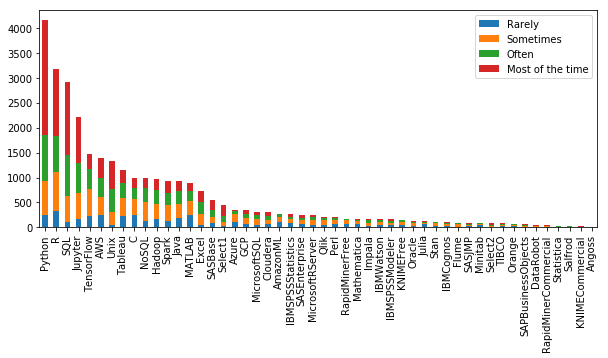

In [316]:
wt_freq_df = res_df.loc[:, res_df.columns.str.startswith('WorkToolsFrequency')].copy()
wt_freq_df.columns = wt_freq_df.columns.map(lambda x: x.replace('WorkToolsFrequency',''))
freqs = wt_freq_df.iloc[:, 0].unique()
wt_freq_count_df = pd.DataFrame([],index=wt_freq_df.columns)
for freq in freqs[1:]:
    wt_freq_count_df[freq] = (wt_freq_df == freq).sum()
wt_freq_count_df['total'] = wt_freq_count_df.sum(axis=1)
wt_freq_count_df.sort_values('total', ascending=False, inplace=True)

%matplotlib inline
wt_freq_count_df.iloc[:, :-1].plot.bar(stacked=True, figsize=(10,4))

ipythonなどでは，matplotlibを読み込んで，描画する．

```
import matplotlib.pyplot as plt
wt_freq_count_df.iloc[:, :-1].plot.bar(stacked=True, figsize=(10,4))
plt.show()
```

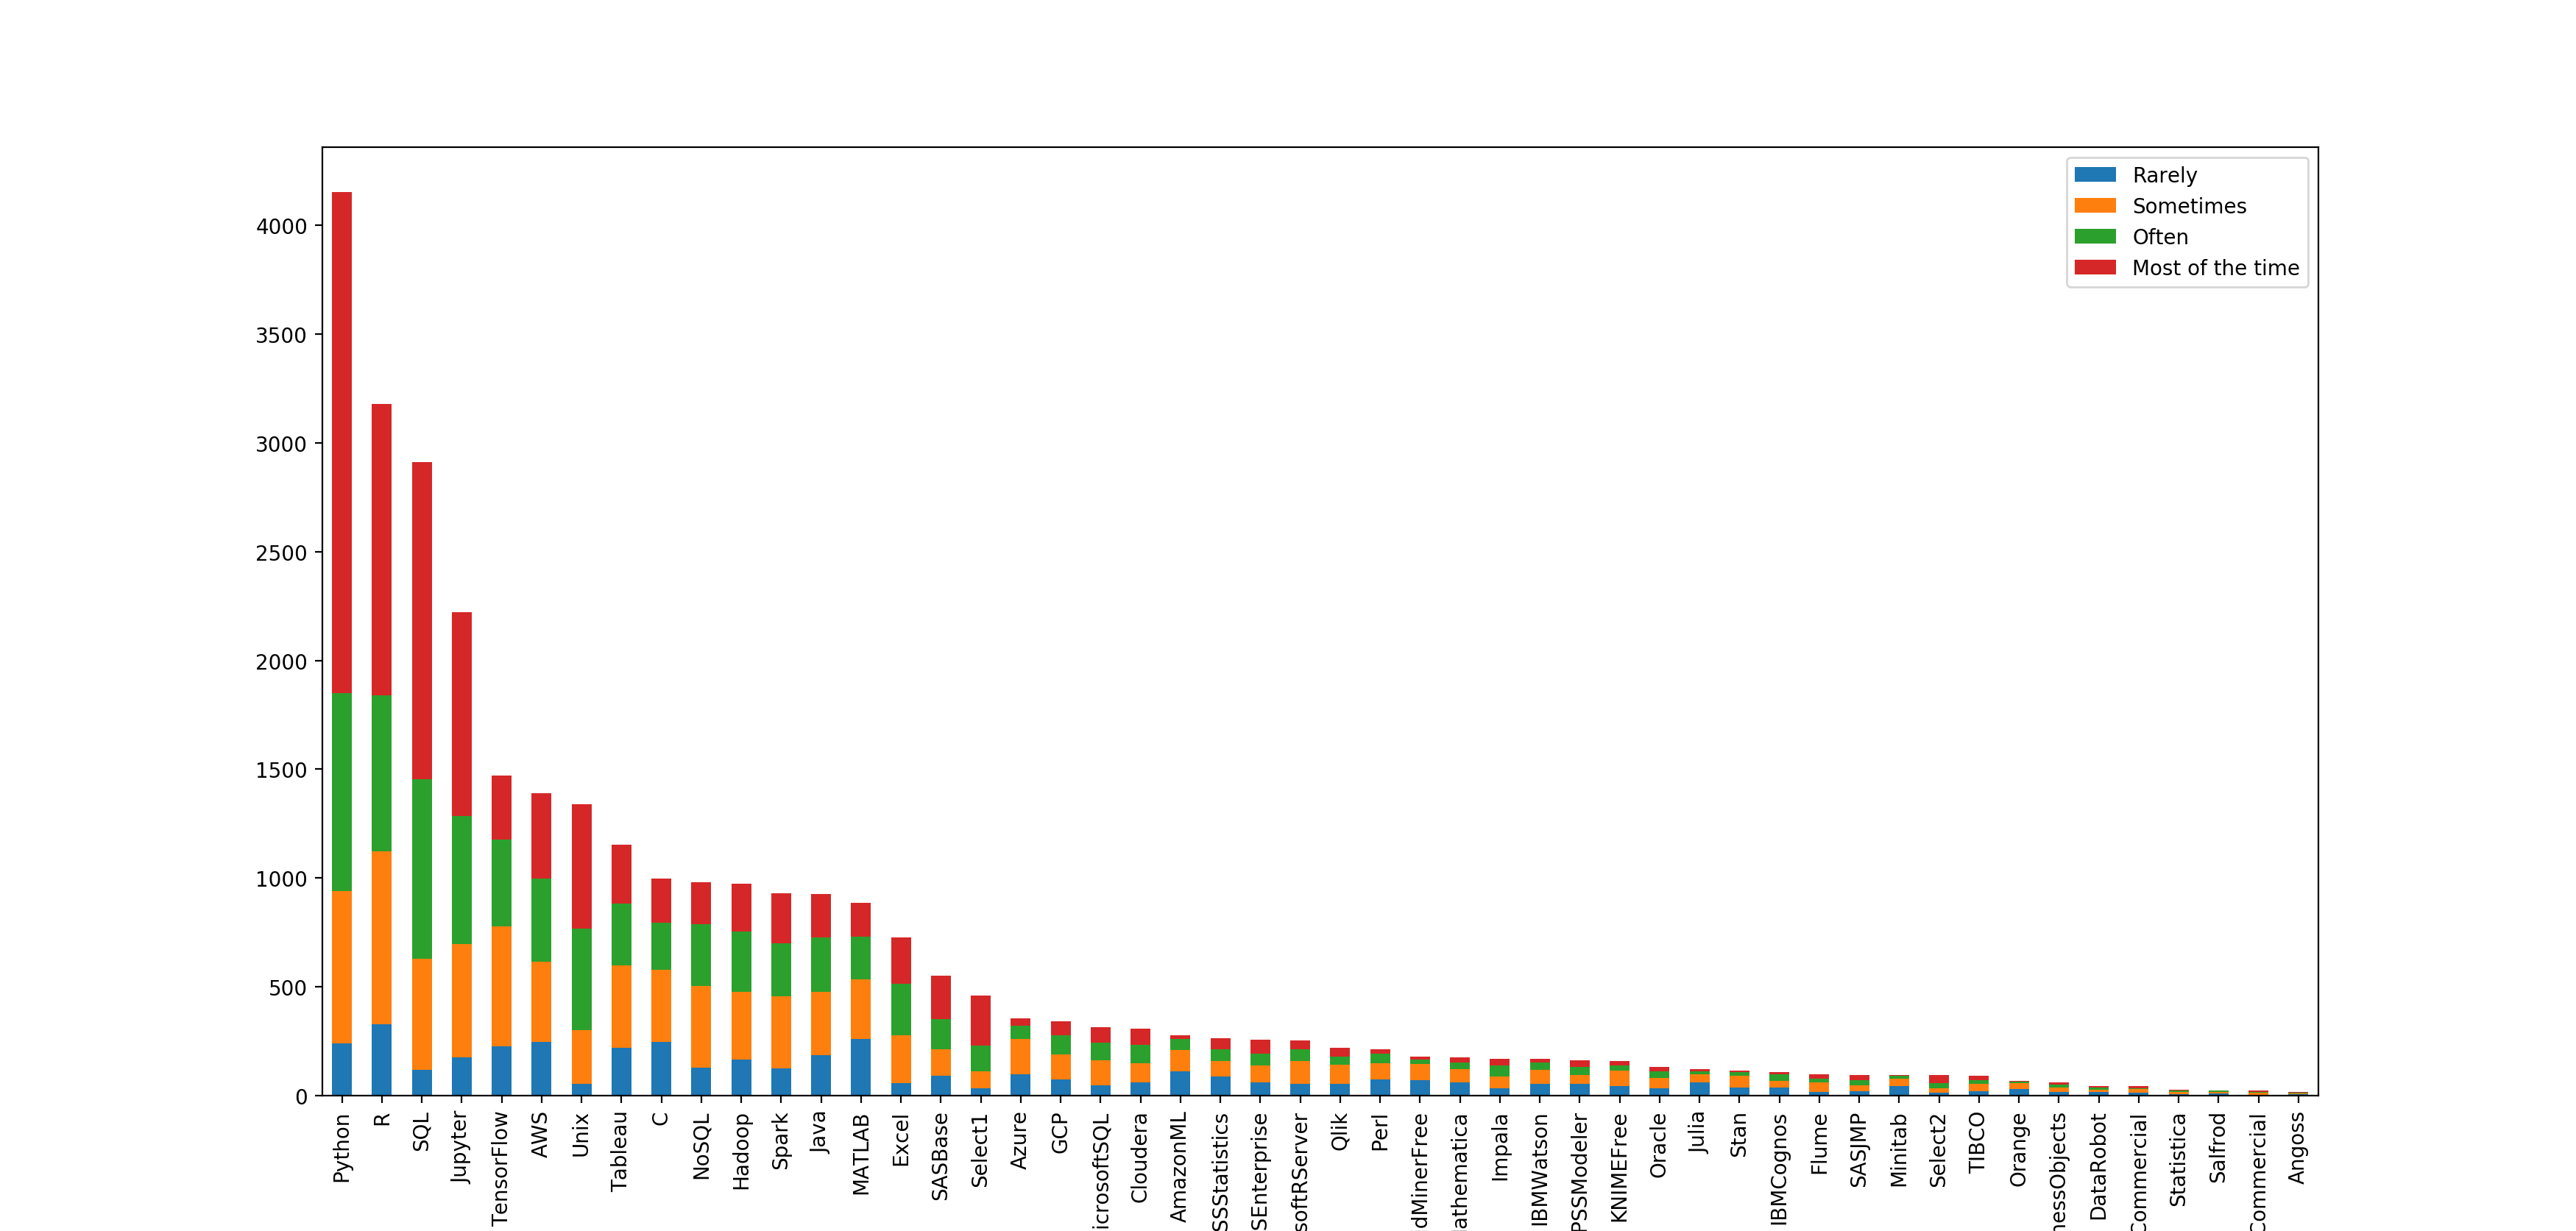